Remember to use
`/eos/user/g/gfidalgo/startup.sh`
OR
`$CERNBOX_HOME/startup.sh`
for the SWAN configuration

In [1]:
!pip show cmsdials

Name: cmsdials
Version: 1.7.1
Summary: The Python api client interface to DIALS service
Home-page: https://github.com/cms-DQM/dials-py
Author: Gabriel Moreira
Author-email: gabrielmscampos@gmail.com
License: 
Location: /home/gfidalgo/miniforge3/envs/DIALS/lib/python3.11/site-packages
Requires: pydantic, requests, urllib3
Required-by: 


In [2]:
# !pip install cmsdials[pandas,tqdm] --user

# !pip install mplhep awkward uproot --user --upgrade

In [2]:
import pandas as pd
import numpy as np

# import cmsdials
from cmsdials import Dials
from cmsdials.auth.bearer import Credentials
from cmsdials.filters import (
    FileIndexFilters,
    LumisectionHistogram1DFilters,
    LumisectionHistogram2DFilters,
    LumisectionFilters,
    RunFilters,
    MEFilters
)

# Authentication

In [2]:
creds = Credentials.from_creds_file()

dials = Dials(creds,workspace="tracker") # this will load into a DQM workspace by default (i.e. Tracker,HCAL,ECAL,etc.)

[2025-05-10 00:03:52,014] INFO: Credentials file not found, triggering device authentication flow...
[2025-05-10 00:03:52,884] INFO: This device will expire in 600 seconds.
[2025-05-10 00:03:52,884] INFO: Go to the following url and authenticate: https://auth.cern.ch/auth/realms/cern/device?user_code=PJPC-JZDG
[2025-05-10 00:03:52,885] INFO: Checking authorization status every 5 seconds...
[2025-05-10 00:03:58,705] INFO: Device not authorized yet.
[2025-05-10 00:04:04,437] INFO: Device not authorized yet.
[2025-05-10 00:04:10,946] INFO: Device not authorized yet.
[2025-05-10 00:04:16,800] INFO: Device authorized, authentication finished successfully!


In [3]:
import matplotlib.pyplot as plt
import mplhep as hep

# General

In [4]:
# You may sometimes now beforehand which runs you want to look at.
RUNNB = 380_237 #378981 #379_390 

In [5]:
df = dials.file_index.list(FileIndexFilters(dataset__regex="2024B")).to_pandas()

df

,dataset_id,dataset,file_id,file_size,creation_date,last_modification_date,logical_file_name,status,err_trace
0,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146277,11696005,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
1,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146317,13481579,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
2,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146357,11208865,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
3,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146397,10730619,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
4,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146437,14503715,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
5,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146477,22956109,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
6,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990146517,11217317,2024-04-05 16:52:29+00:00,2024-04-05 16:52:29+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
7,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990205957,36930277,2024-04-05 17:18:09+00:00,2024-04-05 17:18:09+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
8,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990205997,45157178,2024-04-05 17:18:09+00:00,2024-04-05 17:18:09+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None
9,14940828,/StreamExpress/Run2024B-Express-v1/DQMIO,13990206037,28401552,2024-04-05 17:18:09+00:00,2024-04-05 17:18:09+00:00,/store/express/Run2024B/StreamExpress/DQMIO/Ex...,FINISHED,None


# Tracker Specific

In [13]:


# Here are some commands to try out


# dials.file_index.list(FileIndexFilters(dataset__regex="2024B"))

# dials.h1d.list(LumisectionHistogram1DFilters(me__regex = "charge_PXBarrel")).to_pandas()

# dials.h2d.list_all(LumisectionHistogram2DFilters(me__regex="PXBarrel", ls_number=78, entries__gte=100), max_pages=5)

# dials.lumi.list_all(LumisectionFilters(run_number=360392), max_pages=5)

dials.run.list_all(RunFilters(run_number__lte=365000,page_size=500,),enable_progress=True).to_pandas().dataset.unique()

Progress:   0%|          | 0/1 [00:00<?, ?it/s]

array(['/ZeroBias/Run2022A-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022B-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022C-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022E-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022F-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022C-02Nov22-v1/DQMIO',
       '/ZeroBias/Run2022G-PromptReco-v1/DQMIO',
       '/ZeroBias/Run2022A-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022B-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022E-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022G-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022F-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022D-19Jan2023-v2/DQMIO',
       '/ZeroBias/Run2022E-30May2023v2-v1/DQMIO',
       '/ZeroBias/Run2022B-16Jun2023-v1/DQMIO',
       '/ZeroBias/Run2022C-27Jun2023-v1/DQMIO',
       '/ZeroBias/Run2022B-27Jun2023-v1/DQMIO',
       '/ZeroBias/Run2022A-27Jun2023-v2/DQMIO'], dtype=object)

In [10]:
data = dials.h2d.list_all(LumisectionHistogram2DFilters(), max_pages=5) # requires a filter obj to be passed even if empty.

assert isinstance(data.to_pandas(), pd.DataFrame)

data.to_pandas()

,dataset,me,dataset_id,file_id,run_number,ls_number,me_id,x_min,x_max,x_bin,y_min,y_max,y_bin,entries,data
0,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/clusterposition_zphi_ontrack,14609007,2369296277,352417,1,96,-60.0,60.0,300.0,-3.2,3.2,200.0,827,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352417,1,97,-60.0,60.0,300.0,-3.2,3.2,200.0,184,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352417,1,98,-60.0,60.0,300.0,-3.2,3.2,200.0,141,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352417,1,99,-60.0,60.0,300.0,-3.2,3.2,200.0,115,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352417,1,100,-60.0,60.0,300.0,-3.2,3.2,200.0,86,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXForward/clusterposition_x...,14609007,2369296277,352417,1,101,-20.0,20.0,200.0,-20.0,20.0,200.0,68,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXForward/clusterposition_x...,14609007,2369296277,352417,1,102,-20.0,20.0,200.0,-20.0,20.0,200.0,53,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXForward/clusterposition_x...,14609007,2369296277,352417,1,103,-20.0,20.0,200.0,-20.0,20.0,200.0,46,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXForward/clusterposition_x...,14609007,2369296277,352417,1,104,-20.0,20.0,200.0,-20.0,20.0,200.0,47,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXForward/clusterposition_x...,14609007,2369296277,352417,1,105,-20.0,20.0,200.0,-20.0,20.0,200.0,47,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [11]:
data = dials.h2d.list(LumisectionHistogram2DFilters(me__regex="PXBarrel", ls_number=78, entries__gte=100))
data.to_pandas()

,dataset,me,dataset_id,file_id,run_number,ls_number,me_id,x_min,x_max,x_bin,y_min,y_max,y_bin,entries,data
0,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352425,78,97,-60.0,60.0,300.0,-3.2,3.2,200.0,148,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352425,78,98,-60.0,60.0,300.0,-3.2,3.2,200.0,109,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352505,78,97,-60.0,60.0,300.0,-3.2,3.2,200.0,188,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352505,78,98,-60.0,60.0,300.0,-3.2,3.2,200.0,149,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352505,78,99,-60.0,60.0,300.0,-3.2,3.2,200.0,109,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352509,78,97,-60.0,60.0,300.0,-3.2,3.2,200.0,201,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352509,78,98,-60.0,60.0,300.0,-3.2,3.2,200.0,159,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352509,78,99,-60.0,60.0,300.0,-3.2,3.2,200.0,130,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2373549197,352509,78,100,-60.0,60.0,300.0,-3.2,3.2,200.0,101,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,/ZeroBias/Run2022A-19Jan2023-v2/DQMIO,PixelPhase1/Tracks/PXBarrel/clusterposition_zp...,14609007,2369296277,352567,78,97,-60.0,60.0,300.0,-3.2,3.2,200.0,205,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [12]:
# just showing the return object from Dials and it's fields for a random element.
data.results[3].model_fields

{'dataset': FieldInfo(annotation=str, required=True, metadata=[MaxLen(max_length=255)]),
 'me': FieldInfo(annotation=str, required=True, metadata=[MaxLen(max_length=255)]),
 'dataset_id': FieldInfo(annotation=int, required=True),
 'file_id': FieldInfo(annotation=int, required=True),
 'run_number': FieldInfo(annotation=int, required=True),
 'ls_number': FieldInfo(annotation=int, required=True),
 'me_id': FieldInfo(annotation=int, required=True),
 'x_min': FieldInfo(annotation=float, required=True),
 'x_max': FieldInfo(annotation=float, required=True),
 'x_bin': FieldInfo(annotation=float, required=True),
 'y_min': FieldInfo(annotation=float, required=True),
 'y_max': FieldInfo(annotation=float, required=True),
 'y_bin': FieldInfo(annotation=float, required=True),
 'entries': FieldInfo(annotation=int, required=True),
 'data': FieldInfo(annotation=list[list[float]], required=True)}

In [13]:
Ls1Dhist = LumisectionHistogram1DFilters(me="PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1",run_number=RUNNB,dataset__regex= "ZeroBias")
data = dials.h1d.list(Ls1Dhist)

df = data.to_pandas()

In [14]:
df

,dataset,me,dataset_id,file_id,run_number,ls_number,me_id,x_min,x_max,x_bin,entries,data
0,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,1,5,0.0,80000.0,100.0,549647,"[186.0, 1295.0, 2271.0, 3043.0, 3707.0, 4671.0..."
1,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,2,5,0.0,80000.0,100.0,526061,"[194.0, 1200.0, 2104.0, 2879.0, 3625.0, 4548.0..."
2,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,3,5,0.0,80000.0,100.0,566034,"[190.0, 1239.0, 2128.0, 3036.0, 3803.0, 4728.0..."
3,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,4,5,0.0,80000.0,100.0,556846,"[189.0, 1225.0, 2230.0, 2944.0, 3826.0, 4806.0..."
4,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,5,5,0.0,80000.0,100.0,396037,"[147.0, 951.0, 1661.0, 2215.0, 2770.0, 3244.0,..."
5,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,6,5,0.0,80000.0,100.0,573511,"[236.0, 1297.0, 2270.0, 3125.0, 3810.0, 4726.0..."
6,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,7,5,0.0,80000.0,100.0,556258,"[204.0, 1304.0, 2208.0, 3010.0, 3784.0, 4677.0..."
7,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,8,5,0.0,80000.0,100.0,566292,"[230.0, 1235.0, 2247.0, 3089.0, 3906.0, 4710.0..."
8,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,9,5,0.0,80000.0,100.0,558476,"[185.0, 1286.0, 2217.0, 3059.0, 3912.0, 4831.0..."
9,/ZeroBias/Run2024C-PromptReco-v1/DQMIO,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,14949731,14289062877,380237,10,5,0.0,80000.0,100.0,317740,"[103.0, 739.0, 1240.0, 1690.0, 2243.0, 2633.0,..."


In [15]:
def make_histo(data , ax, **kwargs) -> None:
    ax.set_title(kwargs.pop("title",None))
    ax.set_xlabel(kwargs.pop("xlabel",None))
    ax.set_ylabel(kwargs.pop("ylabel",None))
    edges = np.linspace(data.x_min,data.x_max,101).T
    for i in range(len(data)):
        ax.stairs(values = data.data[i], edges = edges[i] , **kwargs)


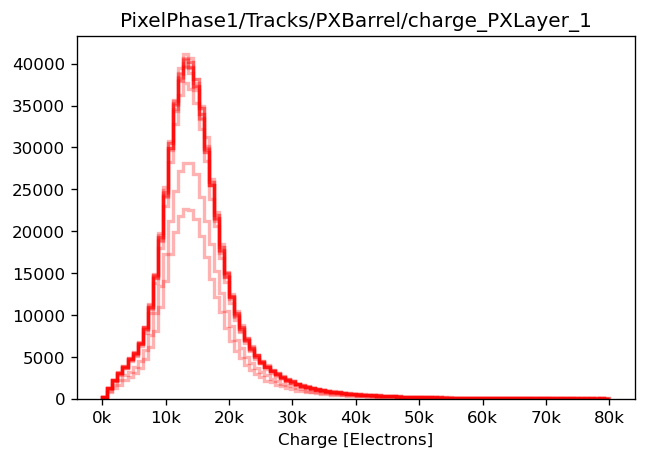

In [16]:
# Toggle this for CMS Styling
# hep.style.use("CMS")


fig,ax = plt.subplots(dpi=120)
make_histo(df,ax,
           title = df.loc[0,'me'],
           xlabel= "Charge [Electrons]",
          color='r',alpha=.3,
          lw=2)
xtick_vals = [i for i in range(0,90_000,10_000)]
xtick_labels = [str(i//1000)+"k" for i in xtick_vals]
ax.set_xticks(xtick_vals,xtick_labels)
plt.show()

# HCAL

We need to decide how we are to filter these histograms?
Most likely by Era and length of the run, so let's find a long running run from era 2024C-F.

DIALS takes inspiration from the DQM GUI in that it is divided into workspaces.
For some reason my default workspace is Tracker, but we can override this to look at HCAL monitoring elements 

In [17]:
dials = Dials(creds,workspace="hcal") # do workspace="ecal" for Ecal

In [18]:
dials.run.list_all(
    RunFilters(run_number__gte=380_000),
    max_pages=5
              ).results

[Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380000, ls_count=30),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380001, ls_count=733),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380002, ls_count=69),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380003, ls_count=97),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380005, ls_count=1101),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380006, ls_count=1),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380007, ls_count=144),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380009, ls_count=41),
 Run(dataset_id=14949731, dataset='/ZeroBias/Run2024C-PromptReco-v1/DQMIO', run_number=380011, ls_count=2),
 Run(dataset_id=1

In [19]:
RUNNB = 380_074 #380_310 #380_237 #378981 #379_390  #these are random runs I looked up.

Now we need to find some 2D MEs

In [20]:
dials.mes.list(MEFilters(dim=2))

[MonitoringElement(me_id=18, me='Hcal/DigiTask/Occupancy/depth/depth1', count=1259277, dim=2),
 MonitoringElement(me_id=19, me='Hcal/DigiTask/Occupancy/depth/depth2', count=1259277, dim=2),
 MonitoringElement(me_id=20, me='Hcal/DigiTask/Occupancy/depth/depth3', count=1259277, dim=2),
 MonitoringElement(me_id=21, me='Hcal/DigiTask/Occupancy/depth/depth4', count=1259277, dim=2),
 MonitoringElement(me_id=22, me='Hcal/DigiTask/Occupancy/depth/depth5', count=1259277, dim=2),
 MonitoringElement(me_id=23, me='Hcal/DigiTask/Occupancy/depth/depth6', count=1259277, dim=2),
 MonitoringElement(me_id=24, me='Hcal/DigiTask/Occupancy/depth/depth7', count=1259277, dim=2),
 MonitoringElement(me_id=25, me='Hcal/DigiTask/Occupancy/depth/depthHO', count=1259277, dim=2),
 MonitoringElement(me_id=102, me='Hcal/DigiTask/OccupancyCut/depth/depth1', count=972616, dim=2),
 MonitoringElement(me_id=103, me='Hcal/DigiTask/OccupancyCut/depth/depth2', count=972616, dim=2),
 MonitoringElement(me_id=104, me='Hcal/Digi

let's choose `Hcal/DigiTask/Occupancy/depth/depth1` for now

In [21]:
me="Hcal/DigiTask/Occupancy/depth/depth1"

data = dials.h2d.list_all(LumisectionHistogram2DFilters(run_number=RUNNB,me=me),max_pages=5).to_pandas()

In [22]:
def make2DHist(data, ax, ls_number = 0, **kwargs) -> None:
    ax.set_title(kwargs.pop("title",None))
    ax.set_xlabel(kwargs.pop("xlabel",None))
    ax.set_ylabel(kwargs.pop("ylabel",None))
    img = np.array(data.loc[ls_number,"data"]).T
    xbin = np.linspace(data.loc[ls_number,"x_min"],
            data.loc[ls_number,"x_max"],
            data.loc[ls_number,"x_bin"].astype(int)+1
           )
    ybin = np.linspace(data.loc[ls_number,"y_min"],
            data.loc[ls_number,"y_max"],
            data.loc[ls_number,"y_bin"].astype(int)+1
           )
    hep.hist2dplot(img,xbins=xbin,ybins=ybin);


Now we make 1 lumisection of a particular ME

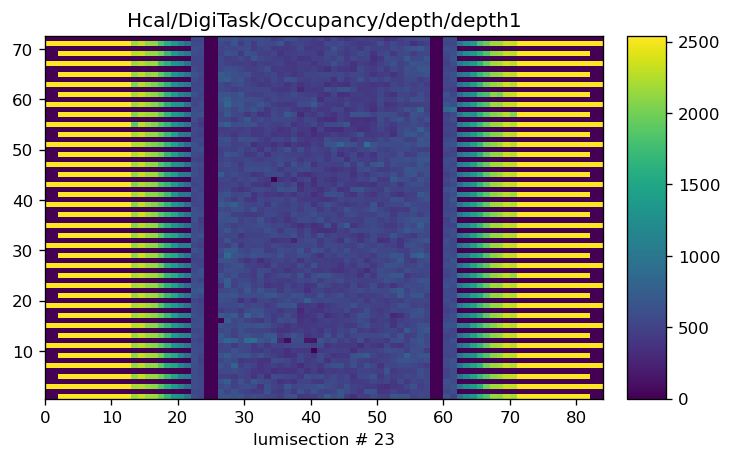

In [23]:
# Toggle this for CMS Styling
# Warning this changes the matplotlib style sheets, so to change back to default styling you need
# plt.style.use("default")

# hep.style.use("CMS")

fig,ax = plt.subplots(dpi=120)

ls_number = 23
kwargs = {"title":me,
         "xlabel":f"lumisection # {ls_number}"
         }
make2DHist(data,ax,ls_number,**kwargs)
plt.show()
